In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read WHO csv data
covid_df = pd.read_csv('../csv/WHO-COVID-19-global-data.csv')

covid_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
283447,2023-04-08,ZW,Zimbabwe,AFRO,2,264578,1,5684
283448,2023-04-09,ZW,Zimbabwe,AFRO,4,264582,0,5684
283449,2023-04-10,ZW,Zimbabwe,AFRO,2,264584,0,5684
283450,2023-04-11,ZW,Zimbabwe,AFRO,0,264584,0,5684


In [4]:
# verify data types
covid_df.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [5]:
# create a new dataframe with only USA
us_covid_df = covid_df.loc[covid_df['Country'] == "United States of America"]
us_covid_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
270296,2020-01-03,US,United States of America,AMRO,0,0,0,0
270297,2020-01-04,US,United States of America,AMRO,0,0,0,0
270298,2020-01-05,US,United States of America,AMRO,0,0,0,0
270299,2020-01-06,US,United States of America,AMRO,0,0,0,0
270300,2020-01-07,US,United States of America,AMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
271487,2023-04-08,US,United States of America,AMRO,0,102873924,0,1118800
271488,2023-04-09,US,United States of America,AMRO,0,102873924,0,1118800
271489,2023-04-10,US,United States of America,AMRO,0,102873924,0,1118800
271490,2023-04-11,US,United States of America,AMRO,0,102873924,0,1118800


In [6]:
# change "Date_reported" into datetime
us_covid_df["Date_reported"] = pd.to_datetime(us_covid_df["Date_reported"])

/Users/ronaldlam/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
# verify change
us_covid_df.dtypes

Date_reported        datetime64[ns]
Country_code                 object
Country                      object
WHO_region                   object
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
dtype: object

In [8]:
# sort and reindex us_covid_df
sorted_us_covid_df = us_covid_df.sort_values(by=['Date_reported'],ignore_index=True)

sorted_us_covid_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,US,United States of America,AMRO,0,0,0,0
1,2020-01-04,US,United States of America,AMRO,0,0,0,0
2,2020-01-05,US,United States of America,AMRO,0,0,0,0
3,2020-01-06,US,United States of America,AMRO,0,0,0,0
4,2020-01-07,US,United States of America,AMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
1191,2023-04-08,US,United States of America,AMRO,0,102873924,0,1118800
1192,2023-04-09,US,United States of America,AMRO,0,102873924,0,1118800
1193,2023-04-10,US,United States of America,AMRO,0,102873924,0,1118800
1194,2023-04-11,US,United States of America,AMRO,0,102873924,0,1118800


In [9]:
sorted_us_covid_df.loc[sorted_us_covid_df['New_deaths'] < 0]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
803,2022-03-16,US,United States of America,AMRO,60969,78983223,-2437,963710


In [10]:
sorted_us_covid_df.at[803, 'New_deaths'] = 2437
sorted_us_covid_df.loc[803]

Date_reported             2022-03-16 00:00:00
Country_code                               US
Country              United States of America
WHO_region                               AMRO
New_cases                               60969
Cumulative_cases                     78983223
New_deaths                               2437
Cumulative_deaths                      963710
Name: 803, dtype: object

In [11]:
sorted_us_covid_df.loc[sorted_us_covid_df['New_deaths'] < 0]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths


In [12]:
clean_us_covid_df = sorted_us_covid_df[['Date_reported', 
                                        'New_cases', 
                                        'Cumulative_cases', 
                                        'New_deaths', 
                                        'Cumulative_deaths']]

In [15]:
clean_us_covid_df

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,0,0,0,0
1,2020-01-04,0,0,0,0
2,2020-01-05,0,0,0,0
3,2020-01-06,0,0,0,0
4,2020-01-07,0,0,0,0
...,...,...,...,...,...
1191,2023-04-08,0,102873924,0,1118800
1192,2023-04-09,0,102873924,0,1118800
1193,2023-04-10,0,102873924,0,1118800
1194,2023-04-11,0,102873924,0,1118800


### Export as CSV

In [14]:
clean_us_covid_df.to_csv('../csv/us_covid_data.csv', index=False)

# Plot rimeseries graph to get an overview of data

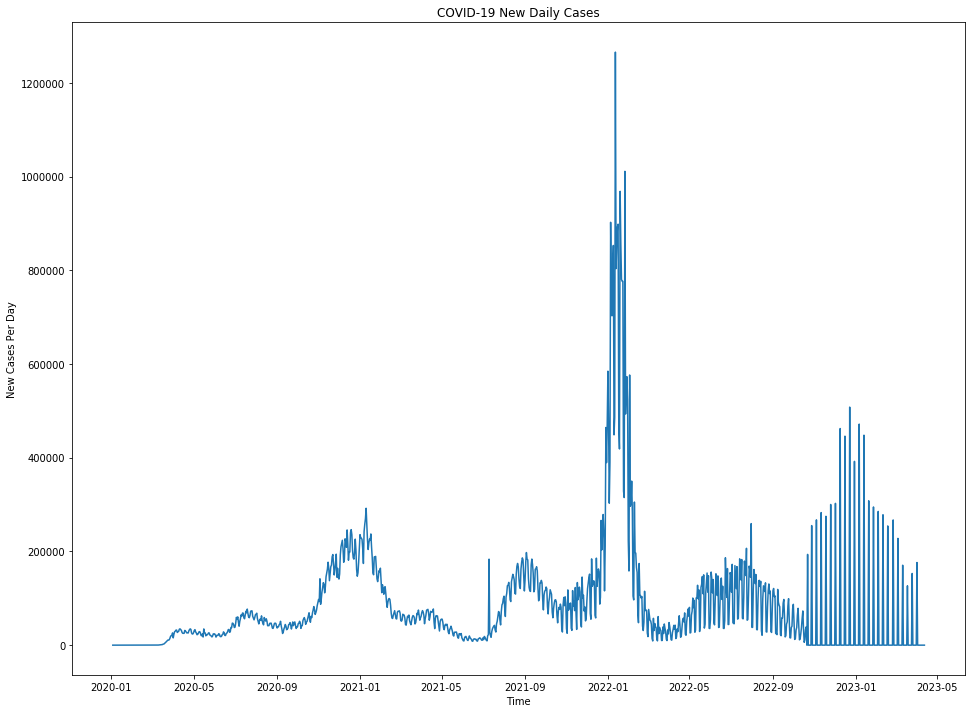

In [11]:
# plot timeseries graph for New_cases
fig, ax = plt.subplots(figsize=(16, 12))

ax.plot(us_covid_df['Date_reported'], us_covid_df['New_cases'])

plt.title("COVID-19 New Daily Cases")
plt.xlabel("Time")
plt.ylabel("New Cases Per Day")

plt.savefig('../images/us_covid_new_cases.png')

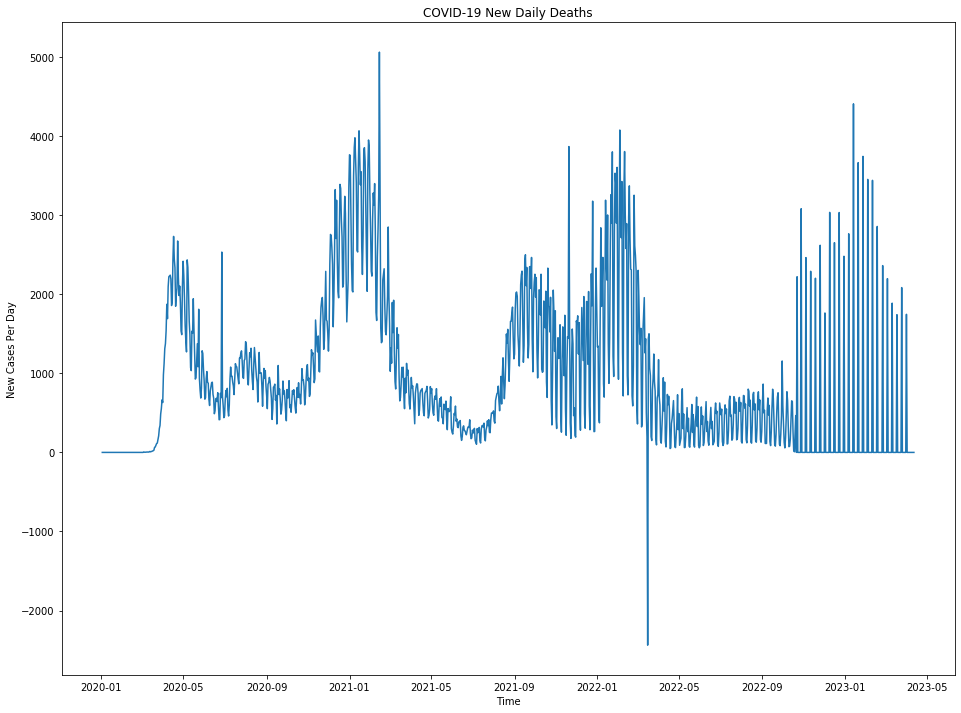

In [12]:
# plot timeseries graph for New_deaths
fig, ax = plt.subplots(figsize=(16, 12))

ax.plot(us_covid_df['Date_reported'], us_covid_df['New_deaths'])

plt.title("COVID-19 New Daily Deaths")
plt.xlabel("Time")
plt.ylabel("New Cases Per Day")

plt.savefig('../images/us_covid_new_deaths.png')

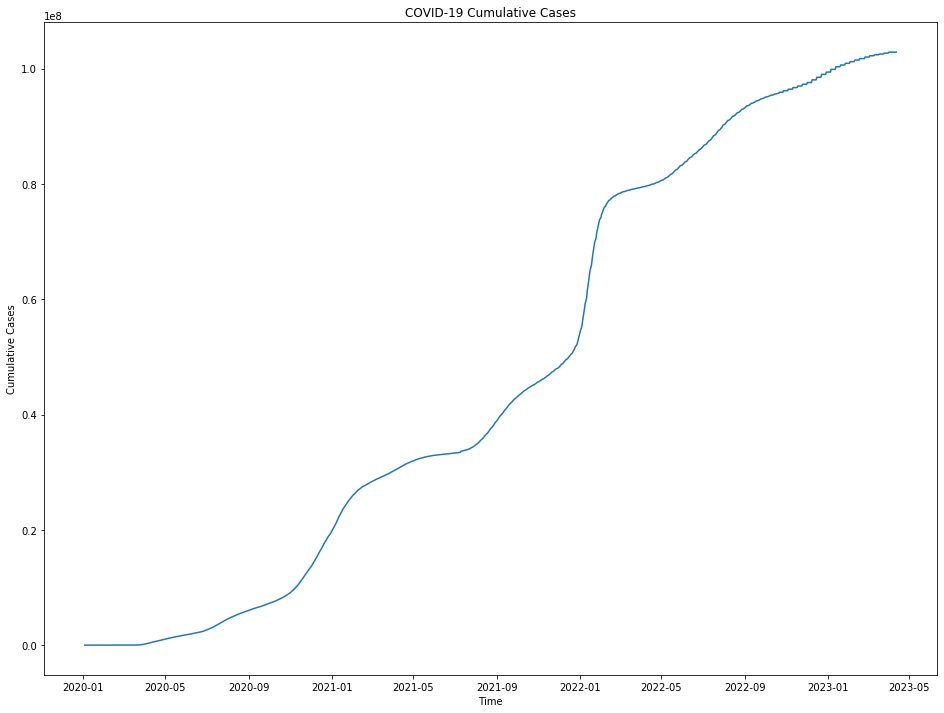

In [16]:
# plot timeseries graph for Cumulative_cases
fig, ax = plt.subplots(figsize=(16, 12))

ax.plot(us_covid_df['Date_reported'], us_covid_df['Cumulative_cases'])

plt.title("COVID-19 Cumulative Cases")
plt.xlabel("Time")
plt.ylabel("Cumulative Cases")

plt.savefig('../images/us_covid_cumulative_cases.png')

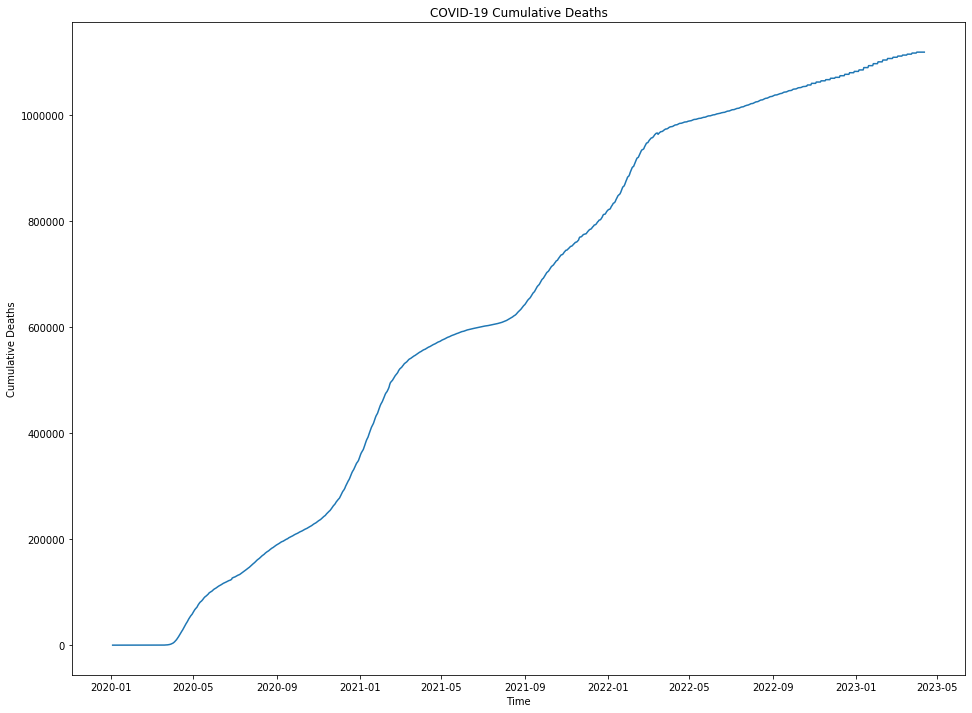

In [17]:
# plot timeseries graph for Cumulative_deaths
fig, ax = plt.subplots(figsize=(16, 12))

ax.plot(us_covid_df['Date_reported'], us_covid_df['Cumulative_deaths'])

plt.title("COVID-19 Cumulative Deaths")
plt.xlabel("Time")
plt.ylabel("Cumulative Deaths")

plt.savefig('../images/us_covid_cumulative_deaths.png')